In [1]:
library(survival)

Warning message:
"package 'survival' was built under R version 4.0.5"


In [16]:
data(rats)
Rata <- rats
colnames(Rata)

Warning message in data(rats):
"data set 'rats' not found"


[1] "litter" "rx"     "time"   "status" "sex"

### Tablas de contingencia

In [39]:
table(Rata$sex, Rata$status, dnn = c('Sexo', 'Estado'))

    Estado
Sexo   0   1
   f 110  40
   m 148   2

In [40]:
table(Rata$rx, Rata$status, dnn = c('Tratamiento', 'Estado'))

           Estado
Tratamiento   0   1
          0 179  21
          1  79  21

### Tiempos promedio de exito

In [49]:
mean(Rata$time[Rata$status == 1 & Rata$sex == 'f'])

[1] 77.275

In [50]:
mean(Rata$time[Rata$status == 1 & Rata$sex == 'm'])

[1] 73

In [52]:
mean(Rata$time[Rata$status == 1 & Rata$rx == 1])

[1] 81.38095

In [53]:
mean(Rata$time[Rata$status == 1 & Rata$rx == 0])

[1] 72.7619

### Cantidad de exitos, censurados y total

In [54]:
length(Rata$status)

[1] 300

In [55]:
length(Rata$status)-sum(Rata$status)

[1] 258

In [56]:
sum(Rata$status)

[1] 42

In [59]:
RataSurv <-Surv(Rata$time, Rata$status)

In [61]:
KM_Rata <- survfit(RataSurv~1)
summary(KM_Rata)

Call: survfit(formula = RataSurv ~ 1)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   34    298       1    0.997 0.00335        0.990        1.000
   39    297       1    0.993 0.00473        0.984        1.000
   40    295       1    0.990 0.00579        0.979        1.000
   45    294       1    0.987 0.00668        0.974        1.000
   49    292       1    0.983 0.00746        0.969        0.998
   50    290       1    0.980 0.00817        0.964        0.996
   54    285       1    0.976 0.00883        0.959        0.994
   55    282       1    0.973 0.00946        0.955        0.992
   64    274       1    0.969 0.01007        0.950        0.989
   66    271       1    0.966 0.01065        0.945        0.987
   67    270       1    0.962 0.01119        0.940        0.984
   68    267       1    0.959 0.01172        0.936        0.982
   70    263       1    0.955 0.01222        0.931        0.979
   71    261       1    0.951 0.01271        0.927        0.977
 

In [62]:
summary(KM_Rata, c(20,70,120))

Call: survfit(formula = RataSurv ~ 1)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   20    300       0    1.000  0.0000        1.000        1.000
   70    263      13    0.955  0.0122        0.931        0.979

In [65]:
KM_Sexo <- survfit(RataSurv~Rata$sex)
summary(KM_Sexo)

Call: survfit(formula = RataSurv ~ Rata$sex)

                Rata$sex=f 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   34    150       1    0.993 0.00664        0.980        1.000
   39    149       1    0.987 0.00937        0.968        1.000
   40    148       1    0.980 0.01143        0.958        1.000
   45    147       1    0.973 0.01315        0.948        0.999
   49    145       1    0.967 0.01468        0.938        0.996
   50    143       1    0.960 0.01606        0.929        0.992
   54    142       1    0.953 0.01731        0.920        0.988
   55    141       1    0.946 0.01846        0.911        0.983
   64    138       1    0.939 0.01956        0.902        0.979
   66    137       1    0.933 0.02058        0.893        0.974
   67    136       1    0.926 0.02154        0.884        0.969
   68    135       1    0.919 0.02245        0.876        0.964
   70    132       1    0.912 0.02333        0.867        0.959
   72    130       1    0.905 

In [66]:
survdiff(RataSurv~Rata$sex, rho = 0)

Call:
survdiff(formula = RataSurv ~ Rata$sex, rho = 0)

             N Observed Expected (O-E)^2/E (O-E)^2/V
Rata$sex=f 150       40     20.6      18.1      35.9
Rata$sex=m 150        2     21.4      17.5      35.9

 Chisq= 35.9  on 1 degrees of freedom, p= 2e-09 

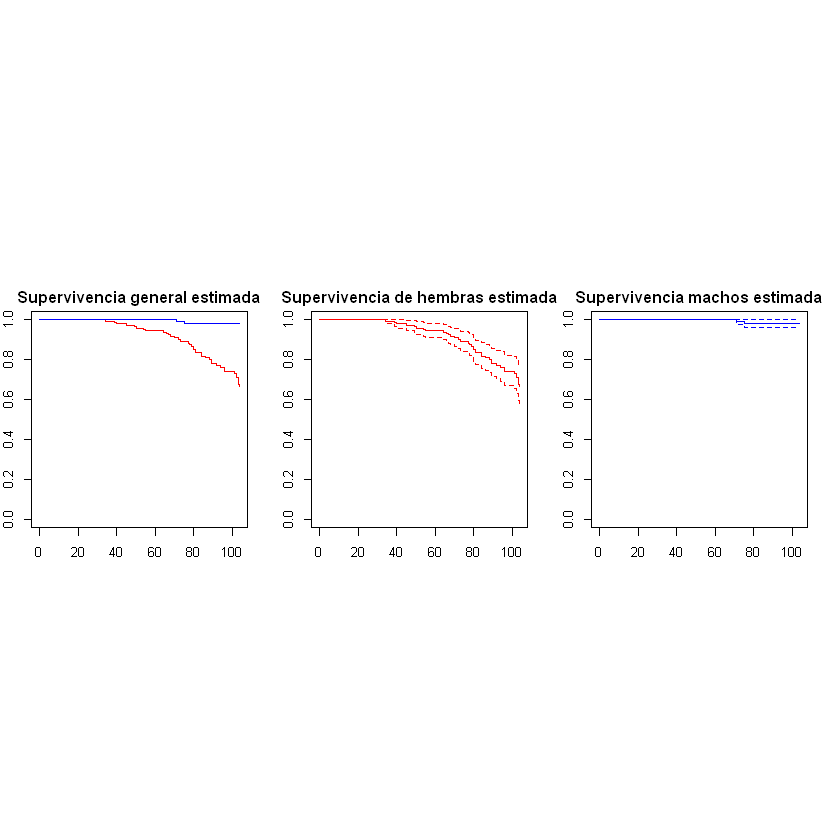

In [81]:
par(mfcol = c(1,3), mar = c(2,3,2,3))
par(pin =c(1.8,1.8))
plot(KM_Sexo,
    col = c('red', 'blue'),
    main = 'Supervivencia general estimada')
plot(KM_Sexo[1],
    col = c('red'),
    main = 'Supervivencia de hembras estimada')
plot(KM_Sexo[2],
    col = c('blue'),
    main = 'Supervivencia machos estimada')

In [92]:
RatasMacho <- Rata[Rata$sex == 'm',]
RatasMSurv <- Surv(RatasMacho$time, RatasMacho$status)
KM_Rx <- survfit(RatasMSurv~RatasMacho$rx)
summary(KM_Rx)

Call: survfit(formula = RatasMSurv ~ RatasMacho$rx)

                RatasMacho$rx=0 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   71     89       1    0.989  0.0112        0.967            1
   75     87       1    0.977  0.0158        0.947            1

                RatasMacho$rx=1 
     time n.risk n.event survival std.err lower 95% CI upper 95% CI


In [93]:
survdiff(RatasMSurv~RatasMacho$rx)

Call:
survdiff(formula = RatasMSurv ~ RatasMacho$rx)

                  N Observed Expected (O-E)^2/E (O-E)^2/V
RatasMacho$rx=0 100        2    1.354     0.308     0.955
RatasMacho$rx=1  50        0    0.646     0.646     0.955

 Chisq= 1  on 1 degrees of freedom, p= 0.3 

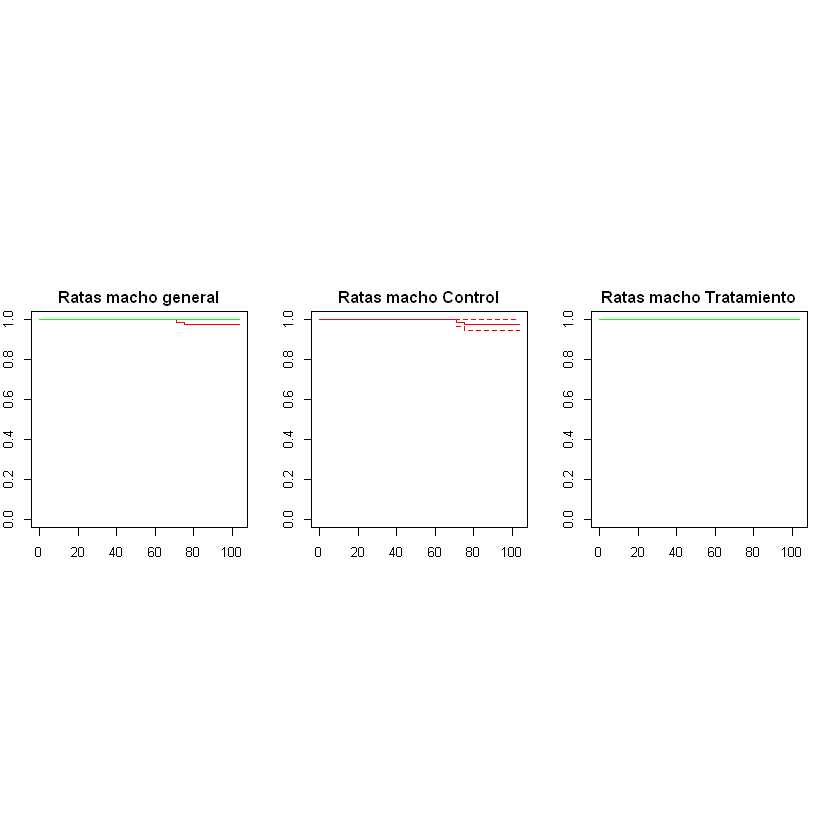

In [100]:
par(mfcol = c(1,3), mar = c(2,3,2,3))
par(pin =c(1.8,1.8))
plot(KM_Rx,
    col = c('red', 'green'),
    main = 'Ratas macho general')
plot(KM_Rx[1],
    col = c('red'),
    main = 'Ratas macho Control')
plot(KM_Rx[2],
    col = c('green'),
    main = 'Ratas macho Tratamiento')